# Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know :

- Which variables are significant in predicting the demands for shred bikes.
- How well those variables describe the bike demands.

# Business Goal

- **Objective**: Model the demand for shared bikes using available independent variables.
- **Purpose**:
    - Help management understand how demand varies with different features.
    - Assist in manipulating business strategies to meet demand levels and customer expectations.
- **Additional Benefits**:
    - Provide insights into demand dynamics for a new market.

# Data Sourcing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
# Reading the day csv file
b_bike_df = pd.read_csv('day.csv')

# Data Inspection

In [3]:
# Checking first five rows
b_bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking last five rows
b_bike_df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [5]:
# Checking shape of the dataframe
b_bike_df.shape

(730, 16)

In [6]:
# Checking data types and null values of dataframe
b_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Checking for null values
b_bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

We can see there is no null values in the dataframe

In [8]:
# Calculates and display summary statistics for the dataframe
b_bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Data Visualization

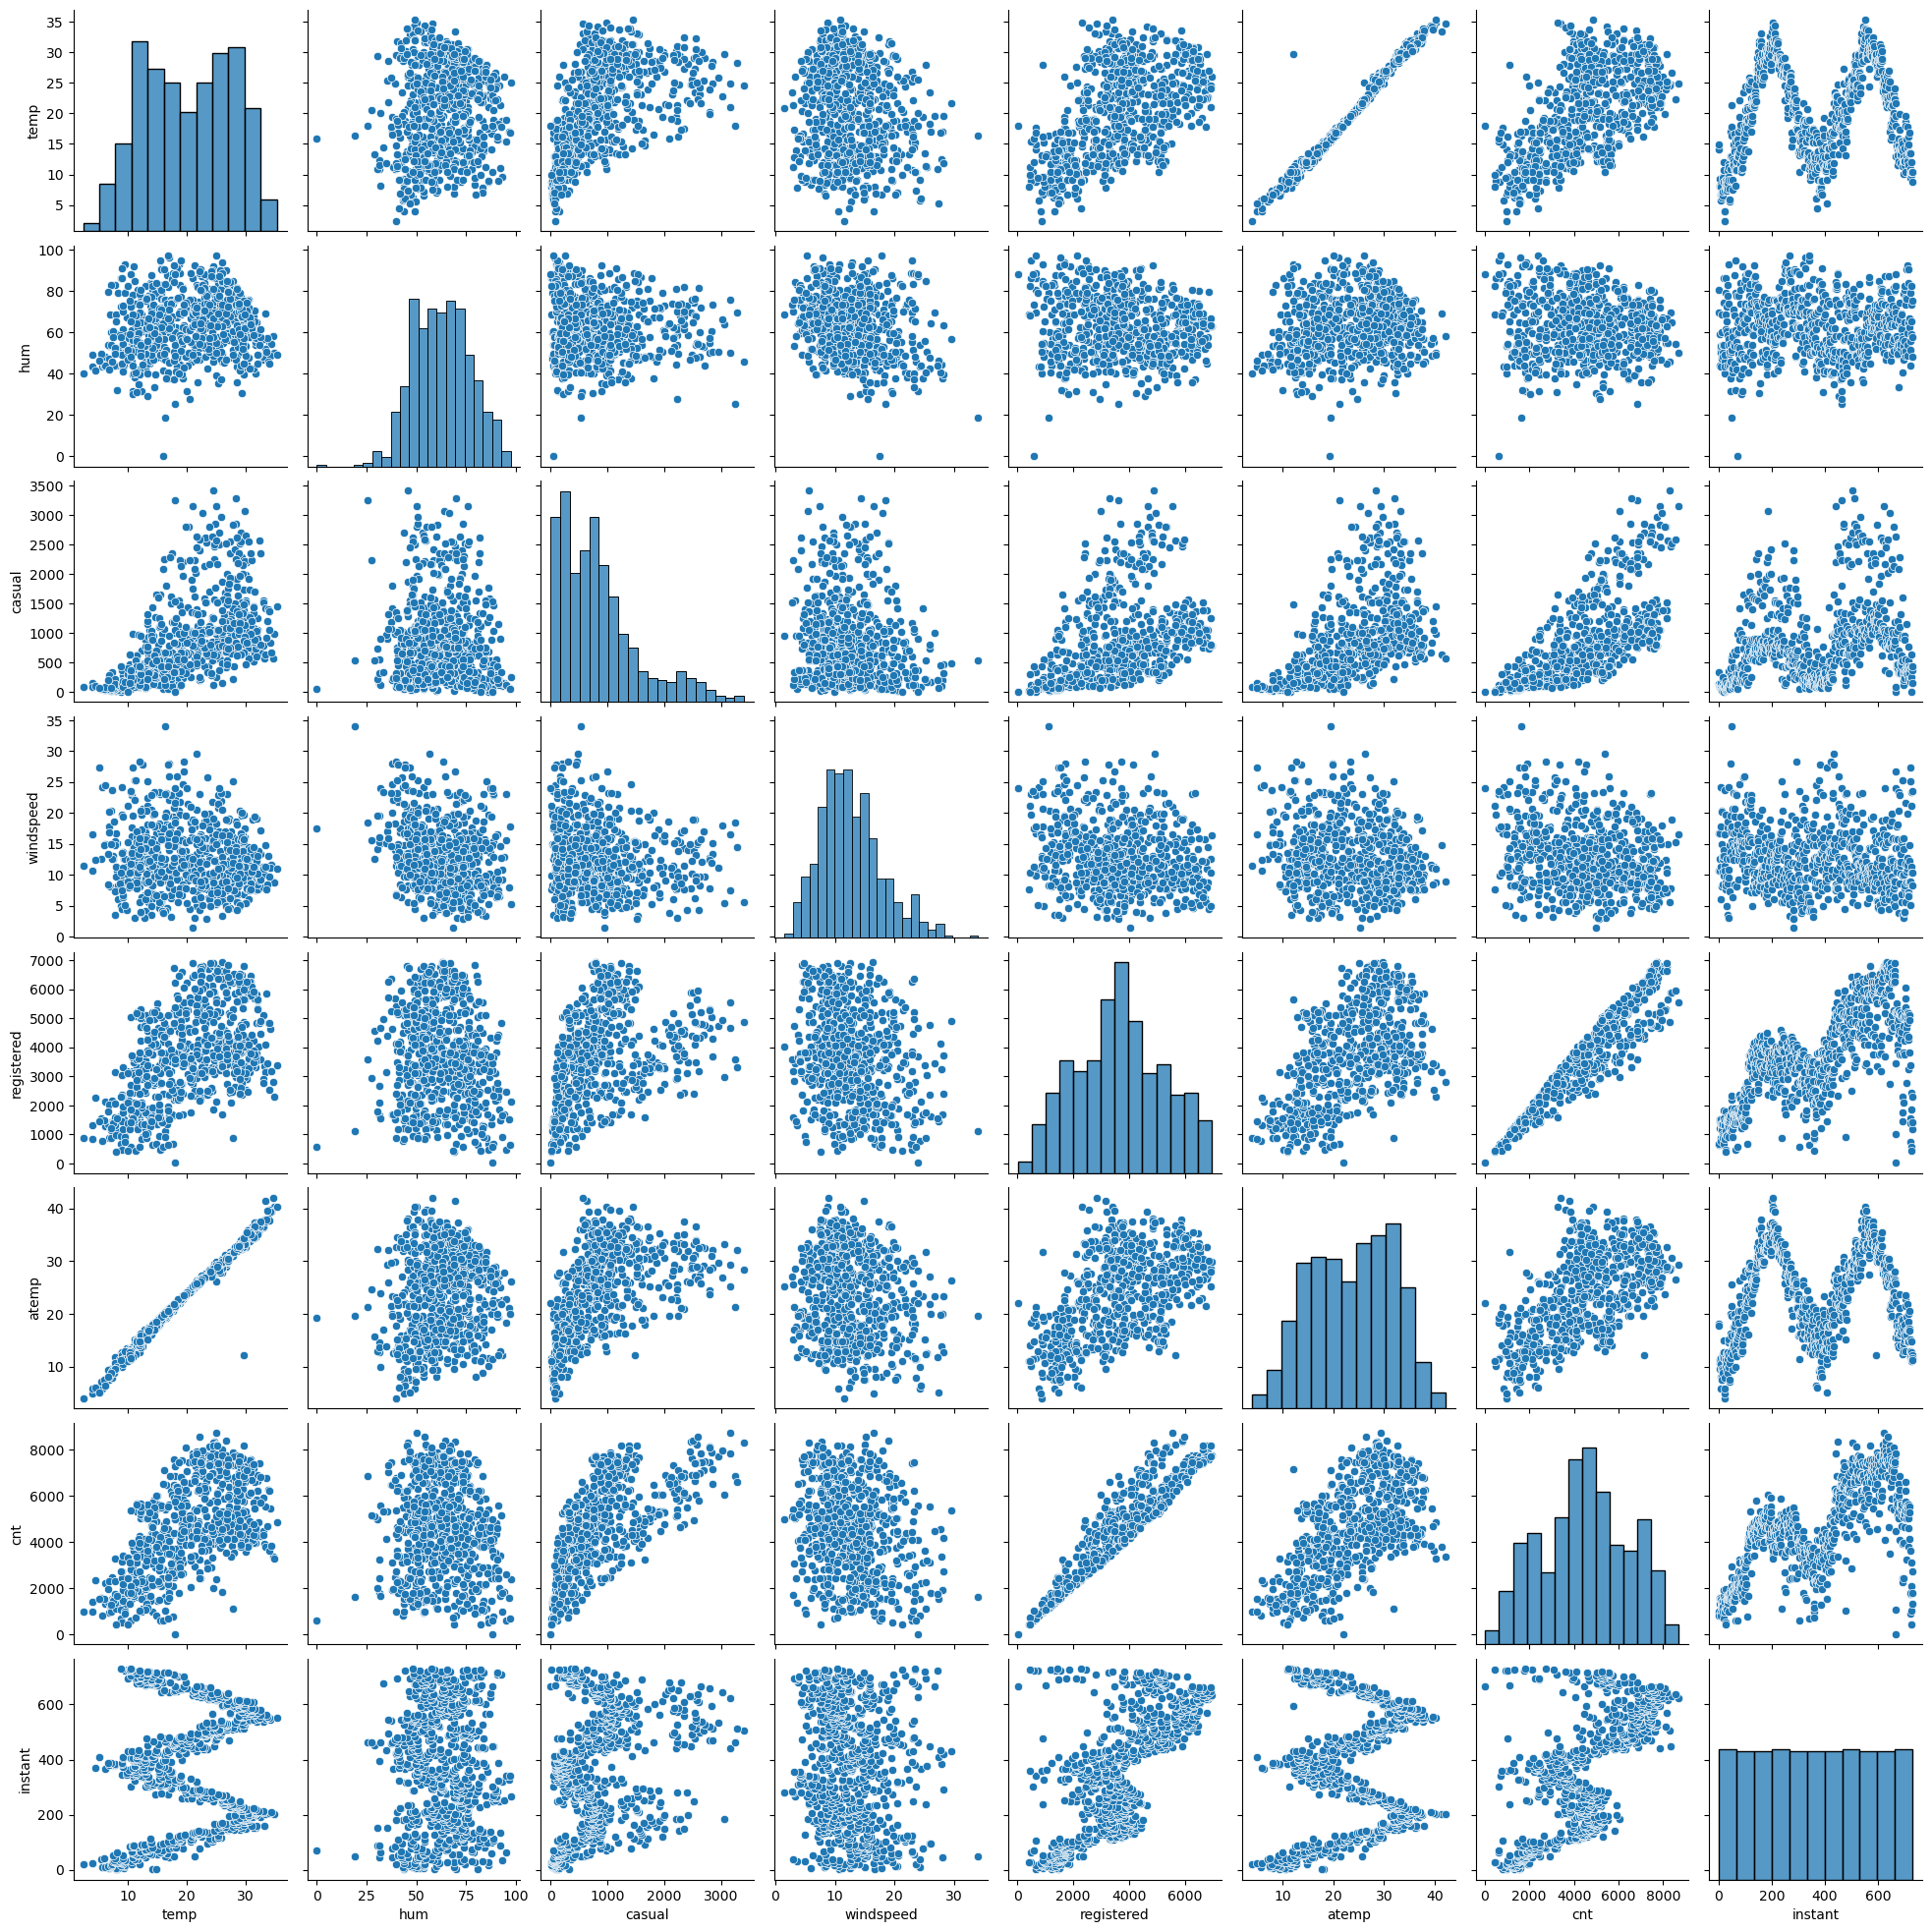

In [9]:
# Visualizing numeric variables of dataset using pairplot
sns.pairplot(b_bike_df, vars=["temp", "hum",'casual','windspeed','registered','atemp','cnt','instant'])
plt.show()

The graph above clearly shows a strong correlation between the count variable and temperature, humidity, and wind speed. We will further investigate these correlations with other variables.

In [10]:
# Mapping categorical variables with their subcategories to help with visualization analysis 
b_bike_df['season']=b_bike_df.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
b_bike_df['mnth']=b_bike_df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
b_bike_df['weathersit']=b_bike_df.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
b_bike_df['weekday']=b_bike_df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

b_bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


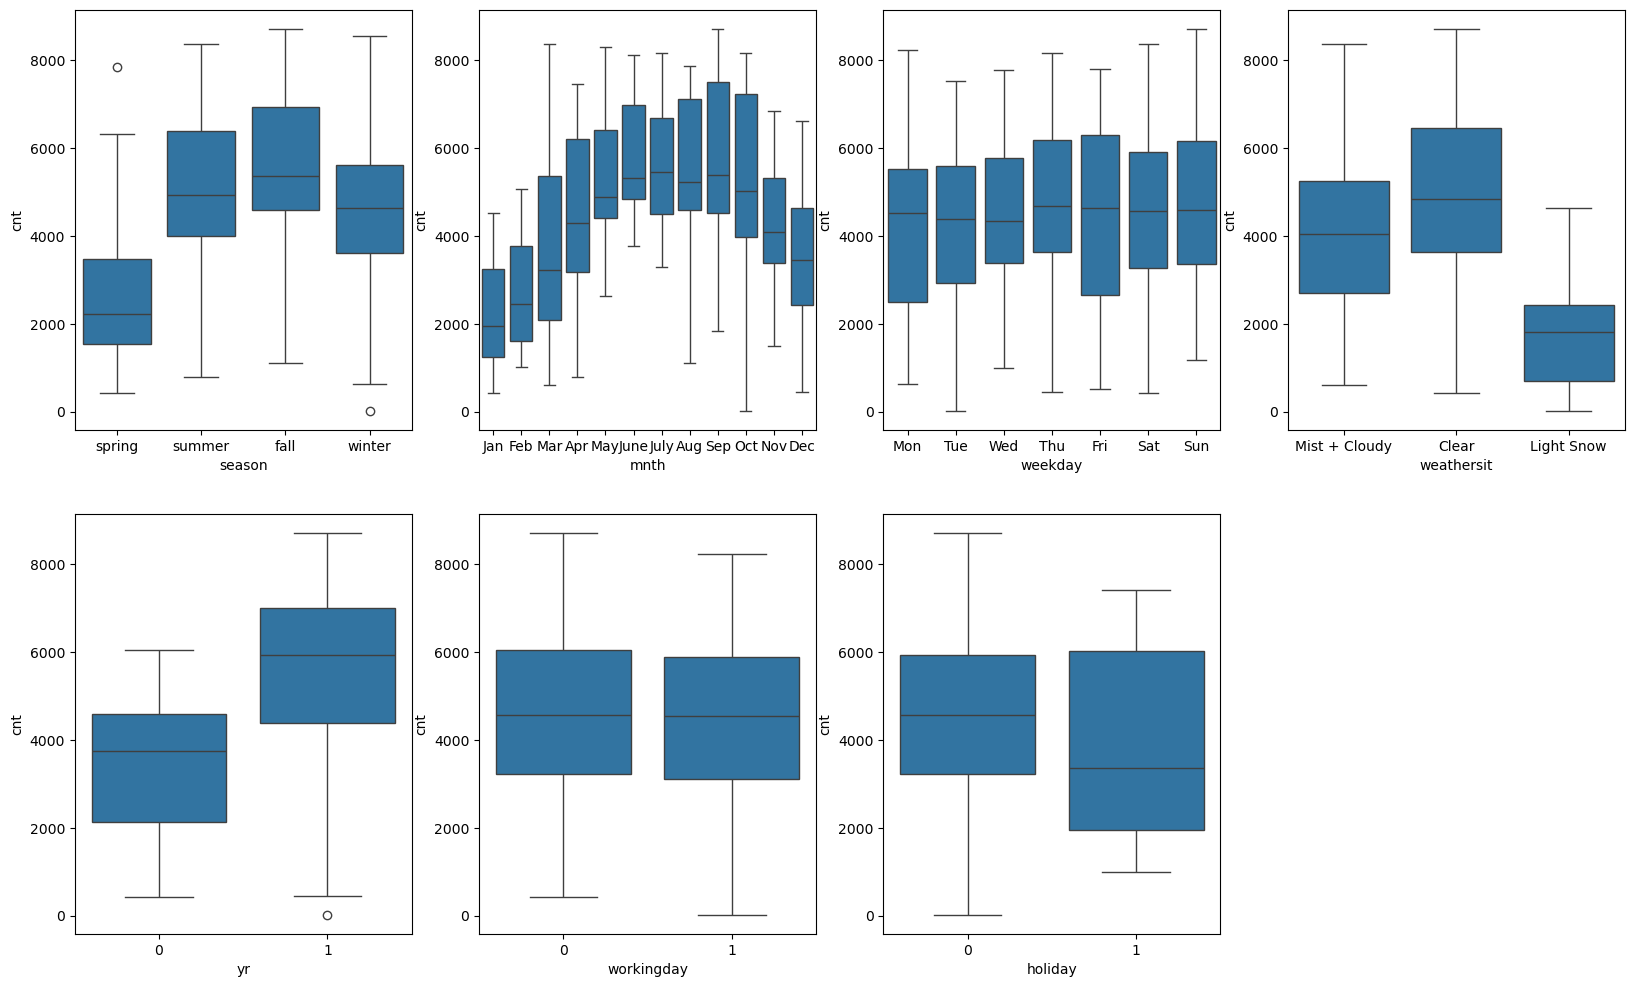

In [11]:
# Visualizing the categorical features of the dataset using a boxplot.
plt.figure(figsize=(20, 12))

plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=b_bike_df)

plt.subplot(2, 4, 2)
sns.boxplot(x='mnth', y='cnt', data=b_bike_df)

plt.subplot(2, 4, 3)
sns.boxplot(x='weekday', y='cnt', data=b_bike_df)

plt.subplot(2, 4, 4)
sns.boxplot(x='weathersit', y='cnt', data=b_bike_df)

plt.subplot(2, 4, 5)
sns.boxplot(x='yr', y='cnt', data=b_bike_df)

plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=b_bike_df)

plt.subplot(2, 4, 7)
sns.boxplot(x='holiday', y='cnt', data=b_bike_df)

plt.show()


The key insights from the plots above are as follows:

- Bike rentals are more common during the summer and fall seasons.
- The highest number of bike rentals occurs in September and October.
- Saturday, Wednesday, and Thursday see the most bike rentals.
- Clear weather conditions are associated with the highest bike rental rates.
- More bikes were rented in 2019 compared to other years.
- There is little to no noticeable difference in bike rental rates based on whether it’s a working day.
- Bike rentals are higher during holidays.

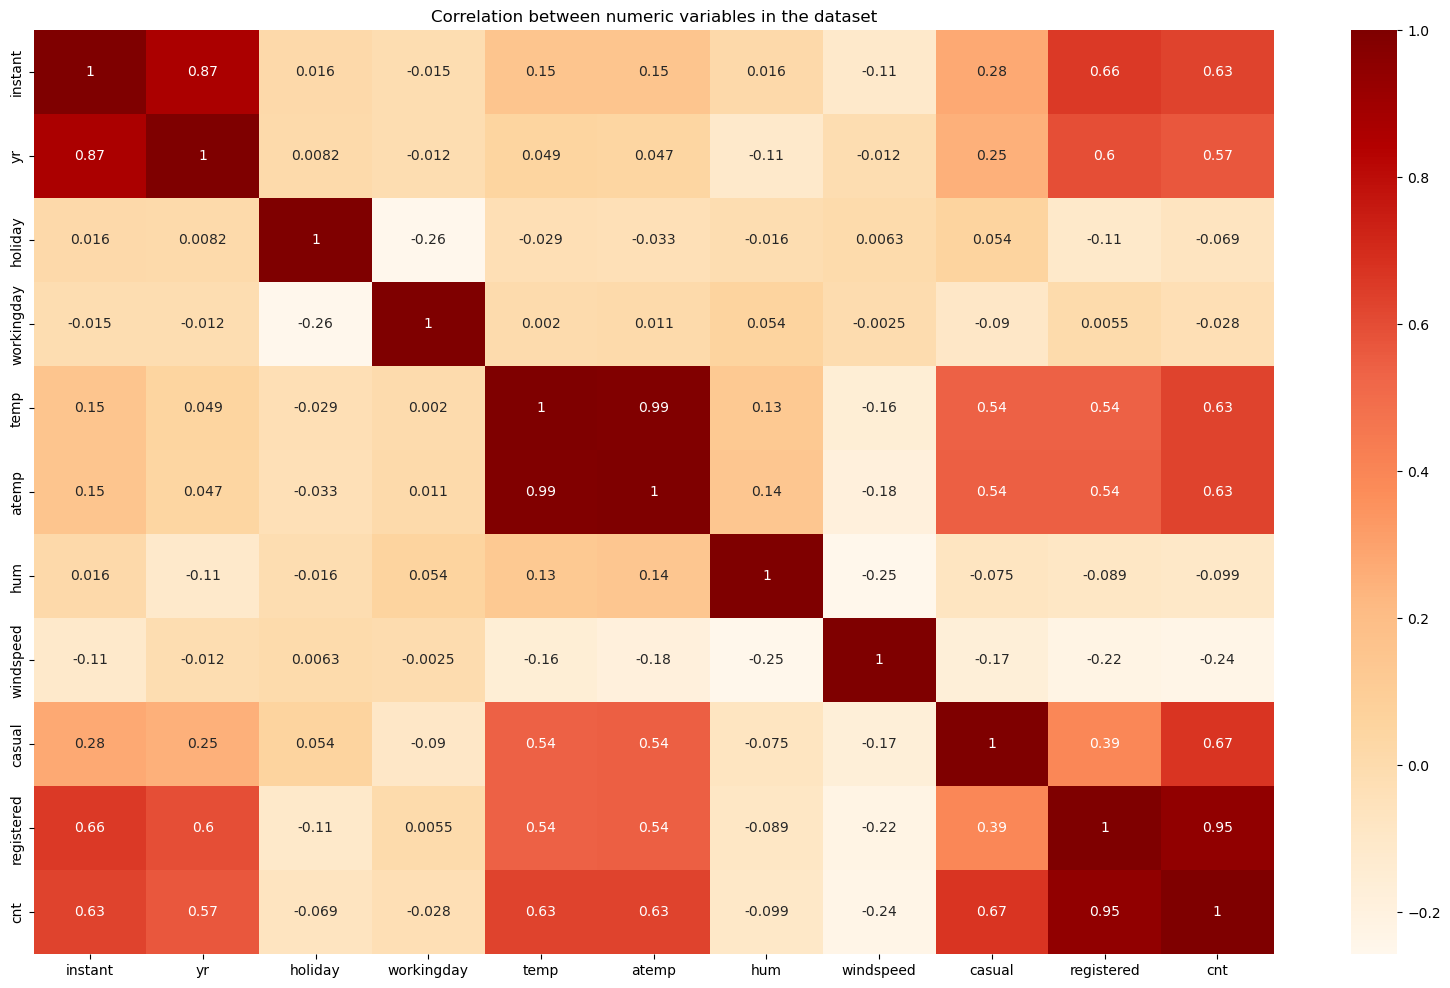

In [12]:
# Selecting only numeric columns from the DataFrame
numeric_df = b_bike_df.select_dtypes(include=['float64', 'int64'])

# Creating a heatmap to visualize the correlation between numeric variables
plt.figure(figsize=(20, 12))
sns.heatmap(numeric_df.corr(), cmap='OrRd', annot=True)
plt.title('Correlation between numeric variables in the dataset')
plt.show()



As observed, multiple variables, including registered, casual, temp, atemp, yr, and workingday, show a correlation with the count variable (cnt). This suggests that we can proceed with building a linear regression model.

In [13]:
# Dropping the unnecessary variables from the dataset 
# The variables atemp, instant, dteday, casual, and registered are dropped as they are not needed for the analysis
# atemp is redundant as temp is already used, dteday and casual are not required for regression analysis

b_bike_df = b_bike_df.drop(['atemp', 'instant', 'dteday', 'casual', 'registered'], axis=1)
b_bike_df.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [14]:
# Checking shape of dataframe again
b_bike_df.shape

(730, 11)

In [15]:
# Checking datatype of the datarame again
b_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [16]:
# Summary of dataset using describe
b_bike_df.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.462641,7.506729,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000


In [17]:
# Checking for null values again 
b_bike_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
cnt           0
dtype: int64

In [18]:
# Creating dummy variables for categorical variables: month, weekday, weathersit, and season
month = pd.get_dummies(b_bike_df.mnth, drop_first=True).astype(int)
weekday = pd.get_dummies(b_bike_df.weekday, drop_first=True).astype(int)
weathersit = pd.get_dummies(b_bike_df.weathersit, drop_first=True).astype(int)
season = pd.get_dummies(b_bike_df.season, drop_first=True).astype(int)

# Adding the dummy variables to the original dataframe
b_bike_df = pd.concat([b_bike_df, month, weekday, weathersit, season], axis=1)
b_bike_df.head(5)


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,...,0,0,0,0,0,0,1,1,0,0
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,...,0,0,0,1,0,0,1,1,0,0
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,1,0,0,1,0,0
3,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,...,0,0,1,0,0,0,0,1,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [19]:
# Removing the original categorical columns since their dummy variable counterparts have already been created
b_bike_df.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1, inplace=True)
b_bike_df.head(10)


,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,0,0,1,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,8.378268,51.8261,6.000868,1606,0,0,0,...,1,0,0,0,0,0,0,1,0,0
6,0,0,0,8.057402,49.8696,11.304642,1510,0,0,0,...,0,1,0,0,0,0,1,1,0,0
7,0,0,1,6.765000,53.5833,17.875868,959,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8,0,0,1,5.671653,43.4167,24.250650,822,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9,0,0,1,6.184153,48.2917,14.958889,1321,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [20]:
# Checking shape of the dataframe
b_bike_df.shape

(730, 29)

In [21]:
# Checking datatypes for the dataframe
b_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   hum            730 non-null    float64
 5   windspeed      730 non-null    float64
 6   cnt            730 non-null    int64  
 7   Aug            730 non-null    int32  
 8   Dec            730 non-null    int32  
 9   Feb            730 non-null    int32  
 10  Jan            730 non-null    int32  
 11  July           730 non-null    int32  
 12  June           730 non-null    int32  
 13  Mar            730 non-null    int32  
 14  May            730 non-null    int32  
 15  Nov            730 non-null    int32  
 16  Oct            730 non-null    int32  
 17  Sep            730 non-null    int32  
 18  Mon       

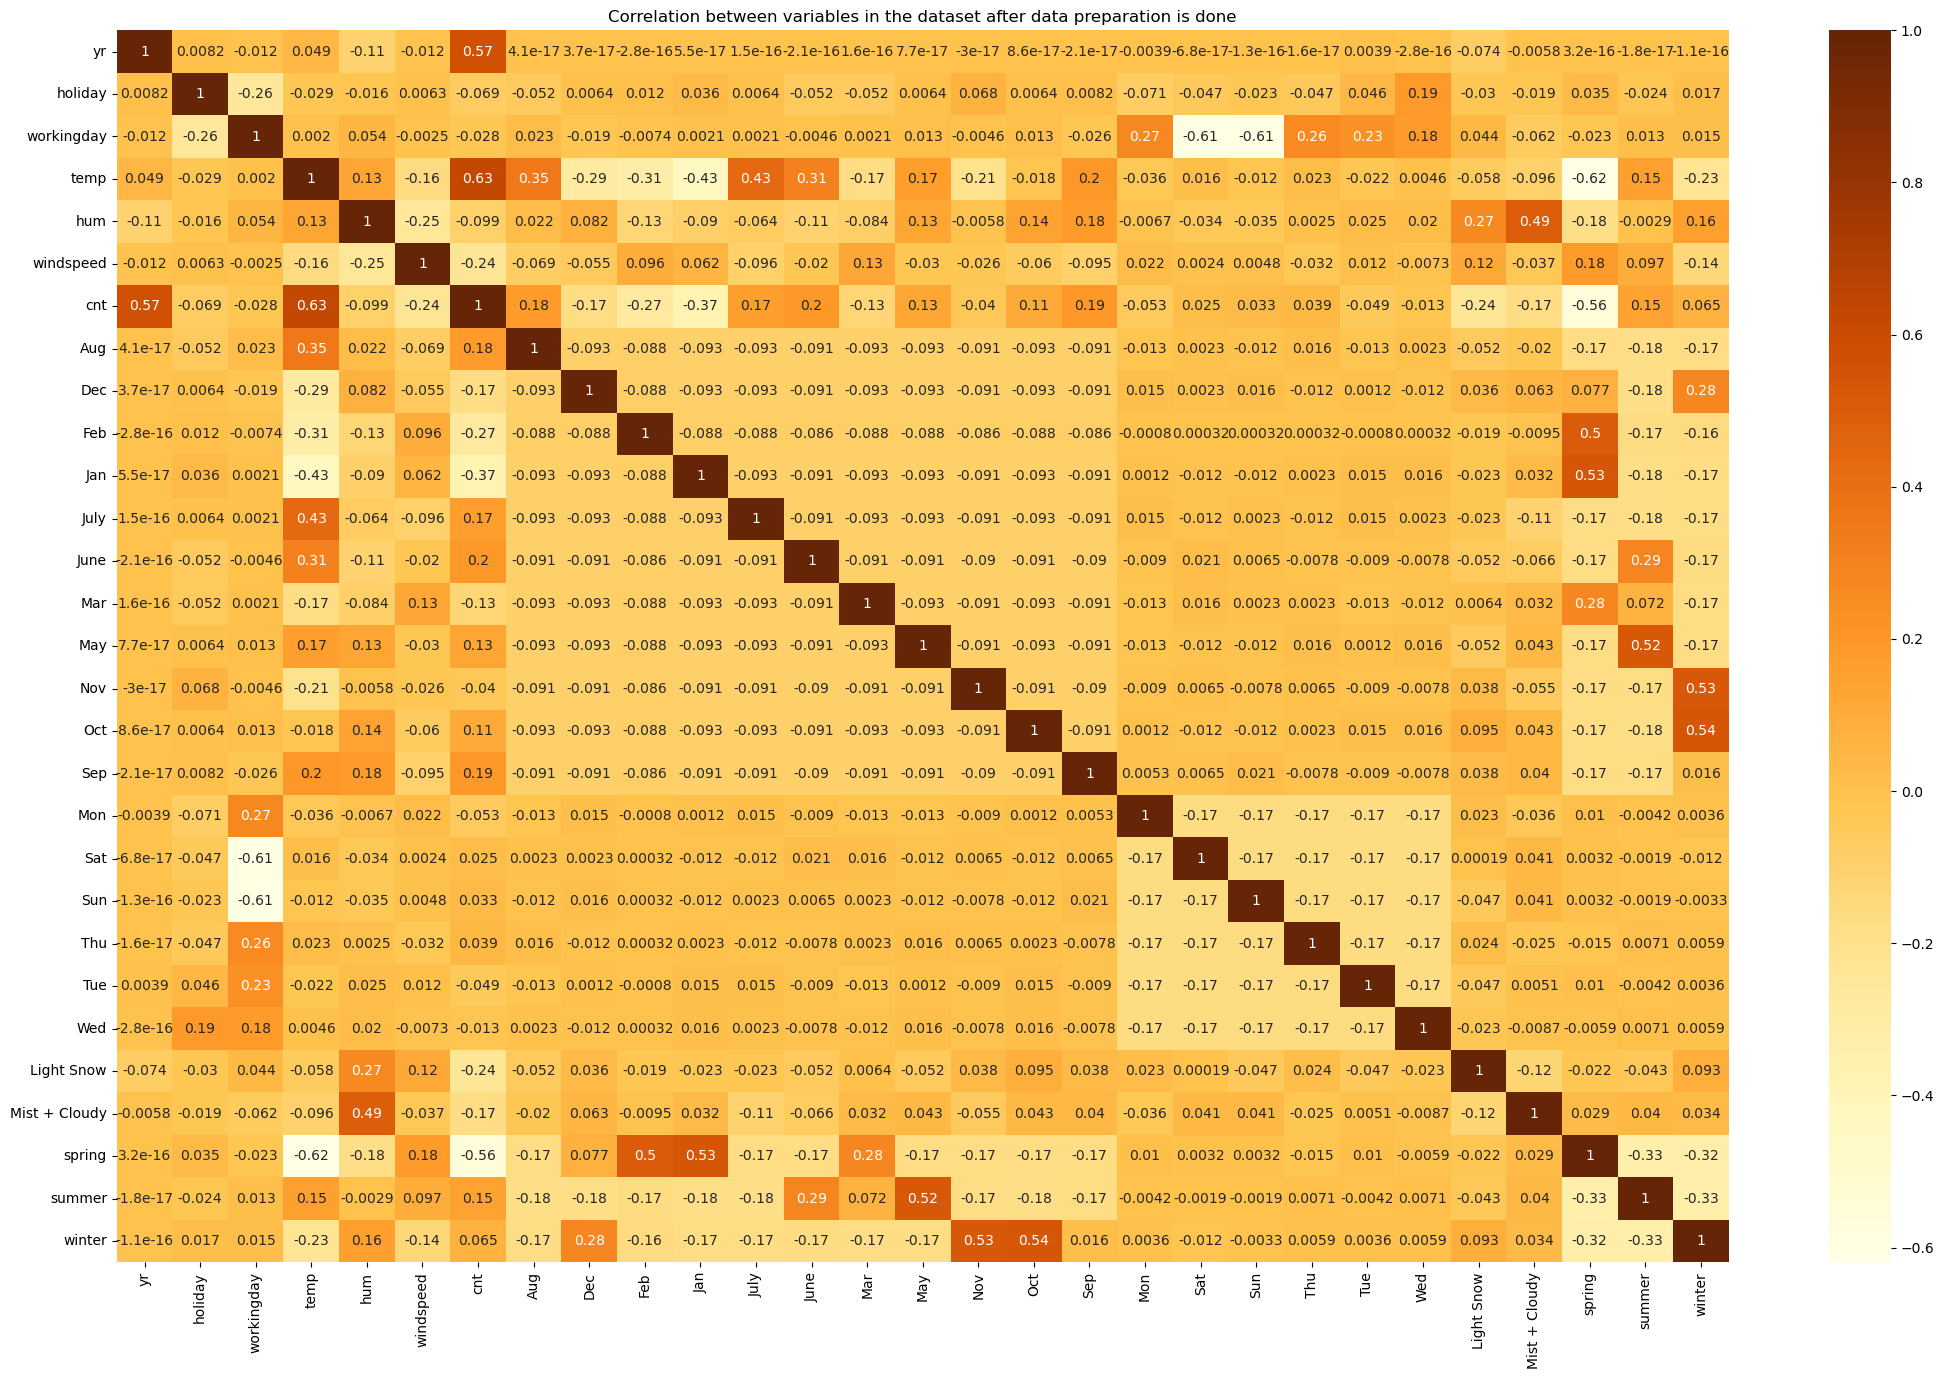

In [22]:
# Set the figure size for better visibility of the heatmap
plt.figure(figsize=(26, 16))

# Create a heatmap to visualize the correlation between variables in the dataset
# 'YlOrBr' is the color map for the heatmap, and annot=True displays the correlation values
sns.heatmap(b_bike_df.corr(), cmap='YlOrBr', annot=True)

# Set the title for the heatmap
plt.title('Correlation between variables in the dataset after data preparation is done')

# Display the heatmap
plt.show()


# Data Modelling

### Data Preprocessing for Model Training: Splitting into Train and Test Sets, and Feature Rescaling

In [23]:
# Splitting the dataset into training and testing sets (70% training, 30% testing)
b_bike_train, b_bike_test = train_test_split(b_bike_df, train_size=0.7, random_state=100)

# Displaying the shapes of the training and test sets
print(f"Training data shape: {b_bike_train.shape}")
print(f"Testing data shape: {b_bike_test.shape}")


Training data shape: (510, 29)
Testing data shape: (220, 29)


### Scaling the Features for Model Training

In [24]:
# Rescaling the variables 'hum', 'windspeed', 'temp', and 'cnt' to ensure all features are on a similar scale
# These variables have larger values compared to others, so they need to be normalized for improved model performance
# MinMaxScaler scales the values to a range between 0 and 1
scaler = MinMaxScaler()
scaler_var = ['hum', 'windspeed', 'temp', 'cnt']

# Applying the MinMaxScaler to the selected variables in the training set to normalize them
b_bike_train[scaler_var] = scaler.fit_transform(b_bike_train[scaler_var])

# Displaying the first few rows of the scaled variables to verify the transformation
print(b_bike_train[scaler_var].head())

          hum  windspeed      temp       cnt
576  0.725633   0.264686  0.815169  0.827658
426  0.640189   0.255342  0.442393  0.465255
728  0.498067   0.663106  0.245101  0.204096
482  0.504508   0.188475  0.395666  0.482973
111  0.751824   0.380981  0.345824  0.191095


In [25]:
# Checking the summary statistics of the training set after scaling the selected variables
# This will help us verify the normalization and ensure all variables are now within the range [0, 1]
b_bike_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,...,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,...,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Upon reviewing the summary statistics, we observe that the maximum value for all scaled variables is 1, indicating that the rescaling process was successful and the values have been properly normalized

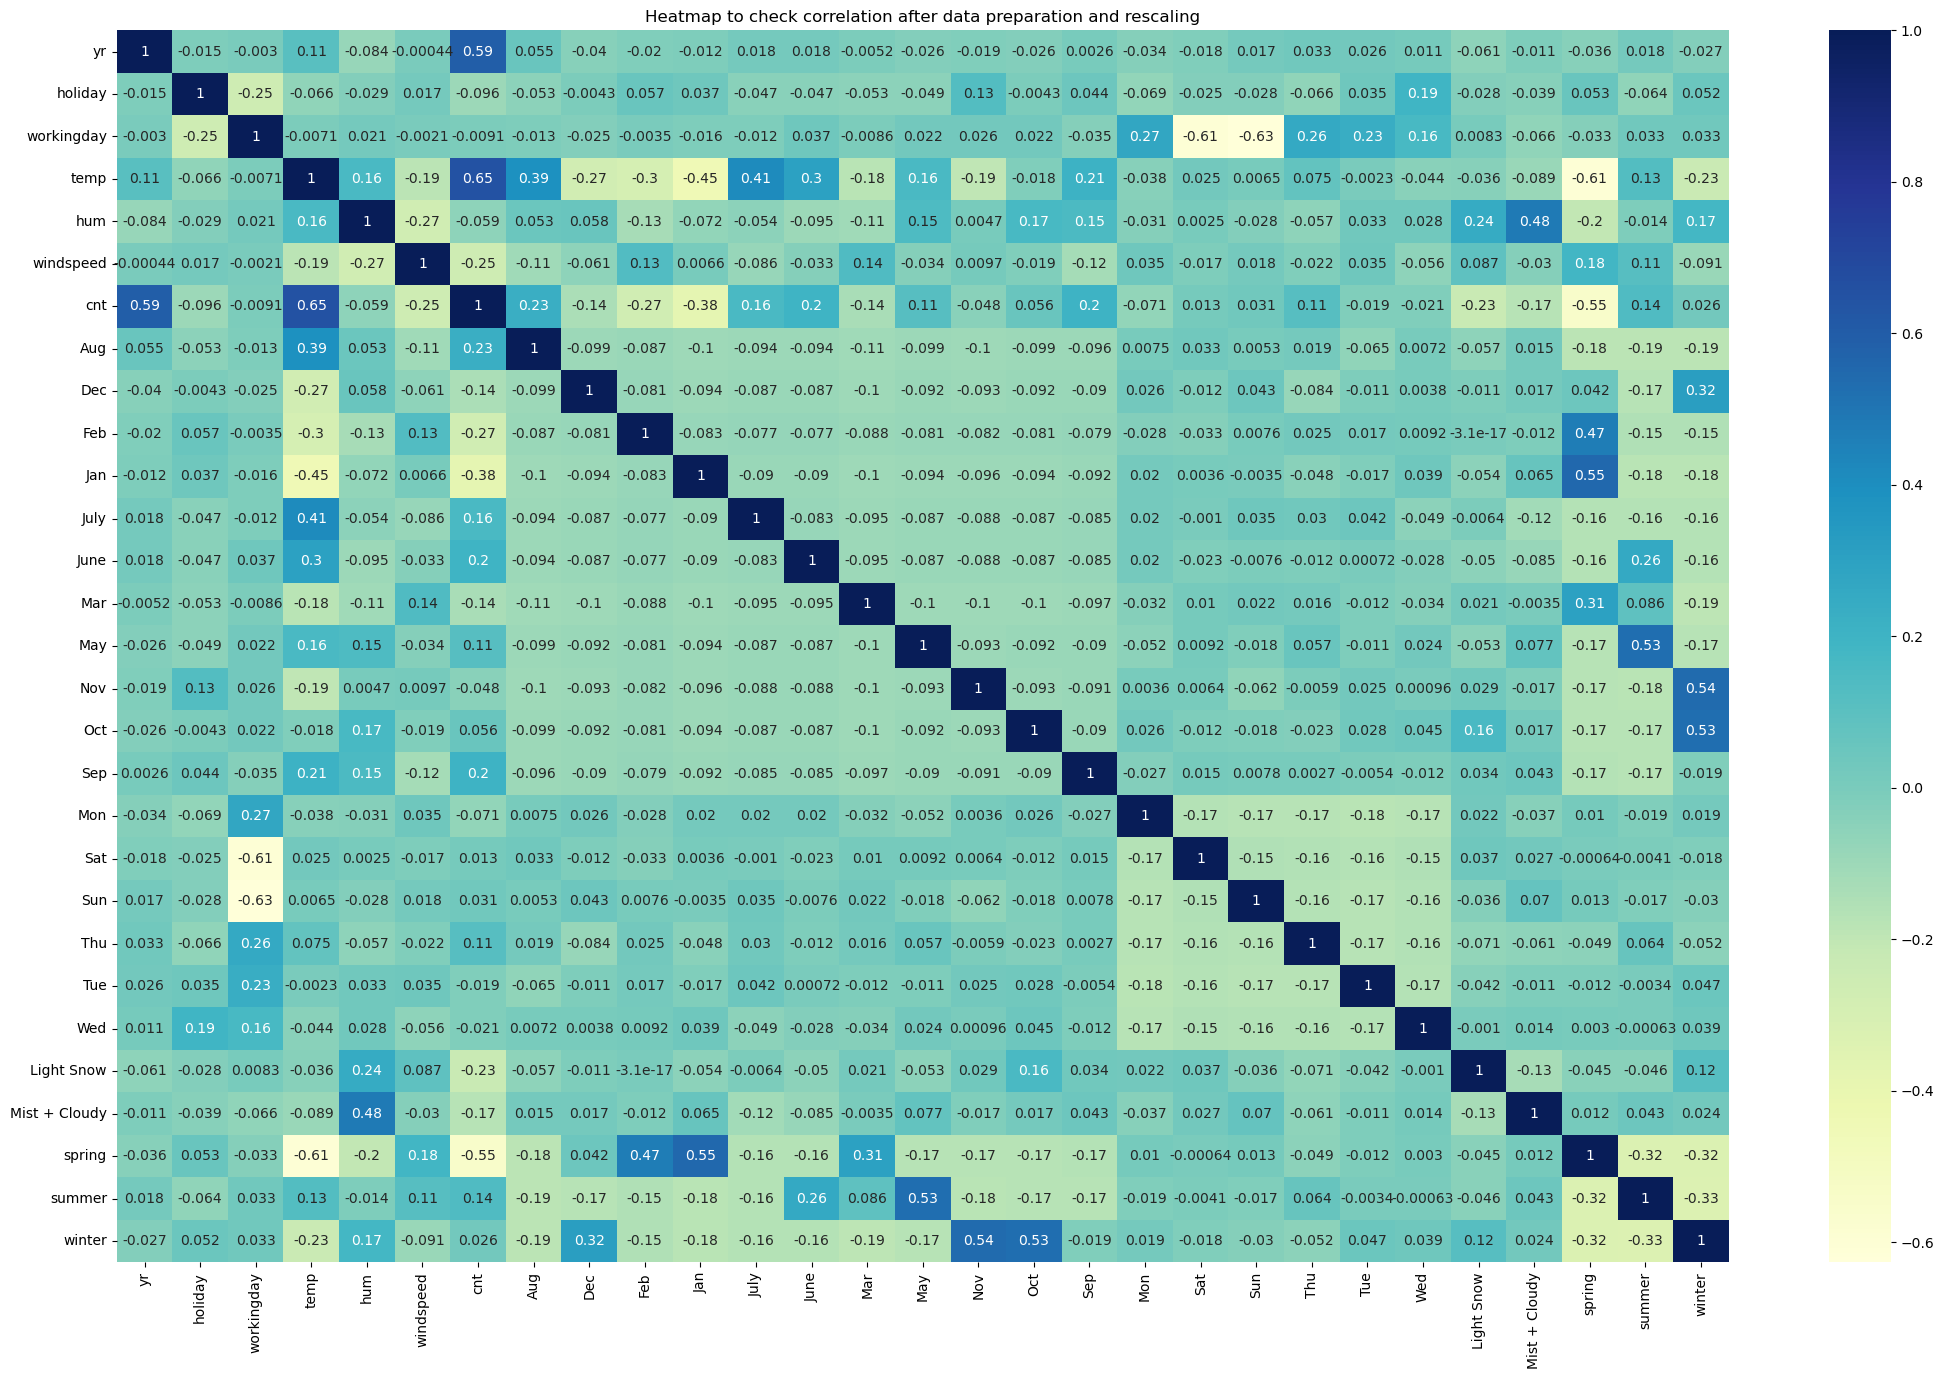

In [26]:
# Checking the correlation coefficients to identify highly correlated variables after data preparation and rescaling
# A heatmap is used to visualize the correlation matrix, where the color intensity indicates the strength of the correlation
plt.figure(figsize=(26, 16))
sns.heatmap(b_bike_train.corr(), cmap="YlGnBu", annot=True)

# Adding a title to the heatmap for better understanding
plt.title('Heatmap to check correlation after data preparation and rescaling')

# Displaying the heatmap
plt.show()


As observed from the heatmap, the 'cnt' (count) variable appears to be heavily correlated with 'temp' (temperature). To further investigate the relationships and variance, we are now using pairplots to visualize the distributions and pairwise relationships between selected variables.

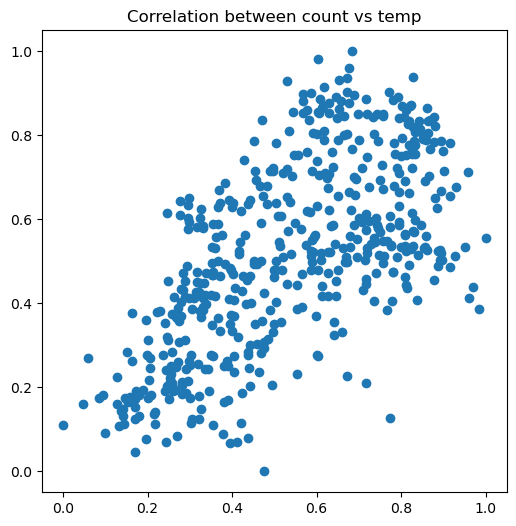

In [27]:
# Checking the correlation between 'cnt' (count) and 'temp' (temperature) using a scatter plot
# This will allow us to visually assess the linear relationship between the two variables
plt.figure(figsize=[6,6])
plt.scatter(b_bike_train.temp, b_bike_train.cnt)

# Adding a title to the scatter plot for clarity
plt.title('Correlation between count vs temp')

# Displaying the plot
plt.show()


### Model Training and Evaluation

In [28]:
# Building our first model using the 'temp' variable to predict 'cnt'
# Preparing the variables for model training by separating the target variable (y_train) and the features (X_train)

y_train = b_bike_train.pop('cnt')  # 'cnt' is the target variable
X_train = b_bike_train  # The remaining columns will be used as features


In [29]:
#checking the variables
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [30]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.498067,0.663106,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
111,0,0,0,0.345824,0.751824,0.380981,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [31]:
# Adding a constant (intercept) to the 'temp' feature to account for the intercept in the regression model
X_train_sm = sm.add_constant(X_train['temp'])

# Creating the first model using Ordinary Least Squares (OLS) regression
lr = sm.OLS(y_train, X_train_sm)

# Fitting the model to the training data
lr_model = lr.fit()

# Displaying the model parameters (coefficients)
lr_model.params

const    0.169031
temp     0.640944
dtype: float64

In [32]:
# Checking the summary of the regression model to assess the results
# The summary includes statistics like R-squared, p-values, coefficients, and other diagnostics
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Mon, 06 Jan 2025   Prob (F-statistic):           2.46e-61
Time:                        17:27:04   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With an R-squared value of 0.416, it indicates that 41% of the variance in the count quantity (cnt) is explained by the temp (temperature) variable. This suggests that while temperature has a moderate relationship with the count, there is still a significant portion of the variance that is influenced by other factors not captured by this model.

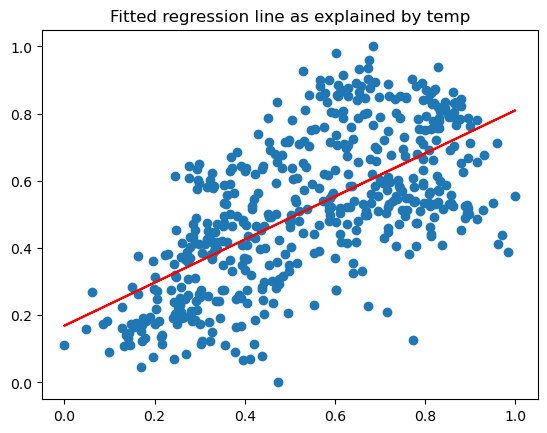

In [33]:
# Visualizing the data with a scatter plot and the fitted regression line to show the best fit
# The scatter plot shows the relationship between 'temp' and 'cnt', and the red line represents the fitted regression line
plt.scatter(X_train_sm.iloc[:, 1], y_train)

# Plotting the regression line using the coefficients from the model (intercept = 0.1690, slope = 0.6409)
plt.plot(X_train_sm.iloc[:, 1], 0.1690 + 0.6409 * X_train_sm.iloc[:, 1], 'r')

# Adding a title to the plot
plt.title('Fitted regression line as explained by temp')

# Displaying the plot
plt.show()

In [34]:
# Adding another variable 'yr' to perform multiple regression and check if it improves the R-squared
# Now the model will use both 'temp' (temperature) and 'yr' (year) as independent variables
X_train_sm = X_train[['temp', 'yr']]
X_train_sm = sm.add_constant(X_train_sm)  # Adding the constant (intercept) to the model

# Creating the second model using Ordinary Least Squares (OLS) regression with two predictors
lr = sm.OLS(y_train, X_train_sm)

# Fitting the model to the training data
lr_model = lr.fit()

# Displaying the model parameters (coefficients)
lr_model.params


const    0.079266
temp     0.584266
yr       0.236739
dtype: float64

In [35]:
# Checking the summary of the regression model with 'temp' and 'yr' as predictors
# This will provide detailed statistics including the R-squared, p-values, coefficients, and other diagnostic measures
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     568.2
Date:                Mon, 06 Jan 2025   Prob (F-statistic):          3.34e-130
Time:                        17:27:04   Log-Likelihood:                 338.80
No. Observations:                 510   AIC:                            -671.6
Df Residuals:                     507   BIC:                            -658.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0793      0.015      5.321      0.000       0.050       0.109
temp           0.5843      0.025     23.698      0.000       0.536       0.633
yr             0.2367      0.011     21.276      0.000       0.215       0.259
==============================================================================
Omnibus:                       32.310   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.054
Skew:                          -0.513   Prob(JB):                     2.71e-10
Kurtosis:                       4.010   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With an R-squared value of 0.692, it indicates that 69% of the variance in the count quantity (cnt) is now explained by both the temp (temperature) and yr (year) variables. This demonstrates a significant improvement over the previous model, suggesting that the inclusion of the year variable helps capture additional variance and enhances the model's explanatory power.

In [36]:
# Checking all the variables (columns) in the dataset to see which ones are available for model building
b_bike_train.columns


Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Aug', 'Dec',
       'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon',
       'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Light Snow', 'Mist + Cloudy',
       'spring', 'summer', 'winter'],
      dtype='object')

In [37]:
# Building the model with all available variables in the dataset
# We will include all features in the dataset to see if using all variables improves the R-squared
X_train_sm = sm.add_constant(X_train)  # Adding the constant (intercept) to the features

# Creating the third model using Ordinary Least Squares (OLS) regression with all variables
lr = sm.OLS(y_train, X_train_sm)

# Fitting the model to the training data
lr_model = lr.fit()

# Displaying the model parameters (coefficients)
lr_model.params


const            0.391163
yr               0.231135
holiday         -0.134754
workingday      -0.060049
temp             0.440512
hum             -0.157355
windspeed       -0.182486
Aug              0.027307
Dec             -0.044387
Feb             -0.037422
Jan             -0.064209
July            -0.028504
June             0.008393
Mar              0.000800
May              0.024732
Nov             -0.039553
Oct              0.005634
Sep              0.090823
Mon             -0.024621
Sat             -0.055719
Sun             -0.049460
Thu              0.004227
Tue             -0.026072
Wed             -0.010225
Light Snow      -0.249947
Mist + Cloudy   -0.057848
spring          -0.040386
summer           0.046443
winter           0.112621
dtype: float64

In [38]:
#checking summary with all the variables
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     97.49
Date:                Mon, 06 Jan 2025   Prob (F-statistic):          1.34e-178
Time:                        17:27:04   Log-Likelihood:                 522.99
No. Observations:                 510   AIC:                            -988.0
Df Residuals:                     481   BIC:                            -865.2
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3912      0.085      4.594      0.000       0.224       0.558
yr                0.2311      0.008     28.384      0.000       0.215       0.247
holiday          -0.1348      0.065     -2.059      0.040      -0.263      -0.006
workingday       -0.0600      0.071     -0.844      0.399      -0.200       0.080
temp              0.4405      0.047      9.412      0.000       0.349       0.532
hum              -0.1574      0.039     -4.043      0.000      -0.234      -0.081
windspeed        -0.1825      0.026     -7.003      0.000      -0.234      -0.131
Aug               0.0273      0.034      0.806      0.421      -0.039       0.094
Dec              -0.0444      0.034     -1.309      0.191      -0.111       0.022
Feb              -0.0374      0.033     -1.123      0.262      -0.103       0.028
Jan              -0.0642      0.034     -1.894      0.059      -0.131       0.002
July             -0.0285      0.035     -0.808      0.420      -0.098       0.041
June              0.0084      0.025      0.336      0.737      -0.041       0.058
Mar               0.0008      0.025      0.032      0.974      -0.048       0.050
May               0.0247      0.021      1.164      0.245      -0.017       0.066
Nov              -0.0396      0.037     -1.077      0.282      -0.112       0.033
Oct               0.0056      0.036      0.156      0.876      -0.066       0.077
Sep               0.0908      0.032      2.822      0.005       0.028       0.154
Mon              -0.0246      0.015     -1.687      0.092      -0.053       0.004
Sat              -0.0557      0.072     -0.777      0.437      -0.197       0.085
Sun              -0.0495      0.072     -0.691      0.490      -0.190       0.091
Thu               0.0042      0.015      0.282      0.778      -0.025       0.034
Tue              -0.0261      0.015     -1.774      0.077      -0.055       0.003
Wed              -0.0102      0.015     -0.669      0.504      -0.040       0.020
Light Snow       -0.2499      0.027     -9.380      0.000      -0.302      -0.198
Mist + Cloudy    -0.0578      0.011     -5.495      0.000      -0.079      -0.037
spring           -0.0404      0.030     -1.335      0.182      -0.100       0.019
summer            0.0464      0.026      1.761      0.079      -0.005       0.098
winter            0.1126      0.028      3.994      0.000       0.057       0.168
==============================================================================
Omnibus:                       78.047   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.442
Skew:                          -0.762   Prob(JB):                     2.45e-45
Kurtosis:                       5.710   Cond. No.                         70.4
================================================================

With an R-squared value of 0.850, it indicates that 85% of the variance in the count quantity (cnt) is explained by all the variables included in the model. This significant increase in explanatory power compared to previous models suggests that incorporating more variables has greatly improved the model's ability to capture the variance in the data.

After determining the R-squared values and the best-fit lines through the manual feature selection approach, we will now adopt an automated method to optimize our model. By using Recursive Feature Elimination (RFE) alongside Variance Inflation Factor (VIF), we aim to identify the most relevant features for model building while removing redundant variables that do not contribute effectively to the model

In [39]:
# Checking the number of columns in the dataset
len(b_bike_train.columns)


28

In [40]:
# Creating the Linear Regression model
lm = LinearRegression()

# Fitting the model on the training data
lm.fit(X_train, y_train)

# Setting up RFE for feature selection, specifying to keep the top 15 features
rfe = RFE(lm, n_features_to_select=15)

# Fitting the RFE object on the training dataset to select the top features
rfe = rfe.fit(X_train, y_train)

In [41]:
# Checking the selected and rejected features based on the RFE process
# 'rfe.support_' indicates which features were selected (True for selected, False for rejected)
# 'rfe.ranking_' shows the ranking of each feature (1 is the most important feature, higher numbers indicate less importance)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 7),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 13),
 ('Tue', False, 6),
 ('Wed', False, 10),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [42]:
# Getting the selected feature variables after RFE
true_rfe = X_train.columns[rfe.support_]


In [43]:
# Checking the selected features stored in the 'true_rfe' variable
true_rfe


Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Dec', 'Jan', 'July',
       'Nov', 'Sep', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter'],
      dtype='object')

In [44]:
# Checking length of true_rfe
len(true_rfe)

15

In [45]:
# Creating a new training set using the features selected by RFE
X_train_rfe = X_train[true_rfe]


In [46]:
# Adding the constant (intercept) to the training set with RFE selected variables
X_train_rfe = sm.add_constant(X_train_rfe)

# Creating the OLS (Ordinary Least Squares) regression model using the selected variables
lr = sm.OLS(y_train, X_train_rfe)

# Fitting the model to the training data
lr_model = lr.fit()

# Displaying the model parameters (coefficients)
lr_model.params

const            0.319667
yr               0.230404
holiday         -0.091089
temp             0.481503
hum             -0.162213
windspeed       -0.188726
Dec             -0.035461
Jan             -0.043411
July            -0.055250
Nov             -0.038701
Sep              0.075467
Light Snow      -0.246481
Mist + Cloudy   -0.054300
spring          -0.061255
summer           0.042337
winter           0.101921
dtype: float64

In [47]:
# checking summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 06 Jan 2025   Prob (F-statistic):          8.15e-189
Time:                        17:27:05   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3197      0.036      8.859      0.000       0.249       0.391
yr                0.2304      0.008     28.487      0.000       0.215       0.246
holiday          -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp              0.4815      0.037     13.005      0.000       0.409       0.554
hum              -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed        -0.1887      0.026     -7.315      0.000      -0.239      -0.138
Dec              -0.0355      0.018     -2.024      0.043      -0.070      -0.001
Jan              -0.0434      0.018     -2.393      0.017      -0.079      -0.008
July             -0.0553      0.018     -3.030      0.003      -0.091      -0.019
Nov              -0.0387      0.019     -2.057      0.040      -0.076      -0.002
Sep               0.0755      0.017      4.466      0.000       0.042       0.109
Light Snow       -0.2465      0.026     -9.331      0.000      -0.298      -0.195
Mist + Cloudy    -0.0543      0.010     -5.194      0.000      -0.075      -0.034
spring           -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer            0.0423      0.015      2.761      0.006       0.012       0.072
winter            0.1019      0.018      5.656      0.000       0.067       0.137
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# Dropping the constant (intercept) from the dataset before calculating VIF
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

# Calculating the VIF for each feature
vif = pd.DataFrame()
X = X_train_rfe

# Storing the feature names and corresponding VIF values
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Rounding VIF values to two decimal places for readability
vif['VIF'] = round(vif['VIF'], 2)

# Sorting the VIF values in descending order to identify features with high multicollinearity
vif = vif.sort_values(by='VIF', ascending=False)

# Displaying the VIF values for each feature
vif

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
12,spring,4.37
14,winter,4.06
13,summer,2.82
11,Mist + Cloudy,2.32
0,yr,2.09
8,Nov,1.85
6,Jan,1.75


#### How to Determine Which Variables to Eliminate?
When deciding which variables to eliminate from your model, it's essential to evaluate both p-values and Variance Inflation Factors (VIF). Based on an analysis of these factors, along with insights from course content, the following guidelines can help you make informed decisions:

- High p-value, High VIF:
    - Action: Eliminate immediately.
    - Reason: A high p-value indicates that the variable is not statistically significant, and a high VIF suggests strong multicollinearity with other variables, making it redundant.

- High p-value, Low VIF:
    - Action: Remove these variables first.
    - Reason: These variables are not statistically significant but don't contribute to multicollinearity. Removing them can simplify the model without affecting the overall performance too much. After removal, rebuild the model and re-check the VIF.

- Low p-value, High VIF:
    - Action: Remove these variables later.
    - Reason: These variables are statistically significant, but their high VIF indicates they may be highly correlated with other predictors. Consider eliminating them later if necessary, as their correlation with other variables might be impacting model stability.

- Low p-value, Low VIF:
    - Action: Keep these variables.
    - Reason: These variables are both statistically significant and not collinear with others, making them valuable for your model. Retain them to preserve the explanatory power of the model.

In [49]:
# Adding a constant (intercept) to the remaining training variables
X_train_lr1 = sm.add_constant(X_train_rfe)  # Ensure 'workingday' has been dropped previously

# Creating the OLS regression model with the updated variables
lr = sm.OLS(y_train, X_train_lr1)

# Fitting the model to the training data
lr_model = lr.fit()

# Displaying the model summary
lr_model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 06 Jan 2025   Prob (F-statistic):          8.15e-189
Time:                        17:27:05   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3197      0.036      8.859      0.000       0.249       0.391
yr                0.2304      0.008     28.487      0.000       0.215       0.246
holiday          -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp              0.4815      0.037     13.005      0.000       0.409       0.554
hum              -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed        -0.1887      0.026     -7.315      0.000      -0.239      -0.138
Dec              -0.0355      0.018     -2.024      0.043      -0.070      -0.001
Jan              -0.0434      0.018     -2.393      0.017      -0.079      -0.008
July             -0.0553      0.018     -3.030      0.003      -0.091      -0.019
Nov              -0.0387      0.019     -2.057      0.040      -0.076      -0.002
Sep               0.0755      0.017      4.466      0.000       0.042       0.109
Light Snow       -0.2465      0.026     -9.331      0.000      -0.298      -0.195
Mist + Cloudy    -0.0543      0.010     -5.194      0.000      -0.075      -0.034
spring           -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer            0.0423      0.015      2.761      0.006       0.012       0.072
winter            0.1019      0.018      5.656      0.000       0.067       0.137
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Dropping the constant term (intercept) from the dataset before calculating VIF
X_train_lr1 = X_train_lr1.drop(['const'], axis=1)

# Calculating the VIF for each feature in the updated dataset
vif = pd.DataFrame()
X = X_train_lr1  # Using the updated dataset after removing 'workingday' and adding constant

# Storing the feature names and corresponding VIF values
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Rounding VIF values to two decimal places for readability
vif['VIF'] = round(vif['VIF'], 2)

# Sorting the VIF values in descending order to identify features with high multicollinearity
vif = vif.sort_values(by='VIF', ascending=False)

# Displaying the VIF values for each feature
vif


,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
12,spring,4.37
14,winter,4.06
13,summer,2.82
11,Mist + Cloudy,2.32
0,yr,2.09
8,Nov,1.85
6,Jan,1.75


In [51]:
# Adding a constant (intercept) to the remaining training variables
X_train_lr2 = sm.add_constant(X_train_lr1)  # 'Sat' has already been dropped

# Creating the OLS regression model with the updated variables
lr = sm.OLS(y_train, X_train_lr2)

# Fitting the model to the training data
lr_model = lr.fit()

# Displaying the model summary
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 06 Jan 2025   Prob (F-statistic):          8.15e-189
Time:                        17:30:55   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3197      0.036      8.859      0.000       0.249       0.391
yr                0.2304      0.008     28.487      0.000       0.215       0.246
holiday          -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp              0.4815      0.037     13.005      0.000       0.409       0.554
hum              -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed        -0.1887      0.026     -7.315      0.000      -0.239      -0.138
Dec              -0.0355      0.018     -2.024      0.043      -0.070      -0.001
Jan              -0.0434      0.018     -2.393      0.017      -0.079      -0.008
July             -0.0553      0.018     -3.030      0.003      -0.091      -0.019
Nov              -0.0387      0.019     -2.057      0.040      -0.076      -0.002
Sep               0.0755      0.017      4.466      0.000       0.042       0.109
Light Snow       -0.2465      0.026     -9.331      0.000      -0.298      -0.195
Mist + Cloudy    -0.0543      0.010     -5.194      0.000      -0.075      -0.034
spring           -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer            0.0423      0.015      2.761      0.006       0.012       0.072
winter            0.1019      0.018      5.656      0.000       0.067       0.137
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# Dropping the 'hum' variable due to high VIF
X_train_new_3 = X_train_lr2.drop(['hum'], axis=1)

# Adding a constant (intercept) to the remaining training variables
X_train_lr3 = sm.add_constant(X_train_new_3)

# Creating the OLS regression model with the updated variables
lr = sm.OLS(y_train, X_train_lr3)

# Fitting the model to the training data
lr_model = lr.fit()

# Displaying the model summary
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 06 Jan 2025   Prob (F-statistic):          4.75e-186
Time:                        17:35:48   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2450      0.032      7.618      0.000       0.182       0.308
yr                0.2345      0.008     28.687      0.000       0.218       0.251
holiday          -0.0918      0.026     -3.522      0.000      -0.143      -0.041
temp              0.4387      0.036     12.093      0.000       0.367       0.510
windspeed        -0.1585      0.025     -6.276      0.000      -0.208      -0.109
Dec              -0.0428      0.018     -2.413      0.016      -0.078      -0.008
Jan              -0.0500      0.018     -2.719      0.007      -0.086      -0.014
July             -0.0500      0.019     -2.703      0.007      -0.086      -0.014
Nov              -0.0395      0.019     -2.064      0.040      -0.077      -0.002
Sep               0.0687      0.017      4.015      0.000       0.035       0.102
Light Snow       -0.2917      0.025    -11.840      0.000      -0.340      -0.243
Mist + Cloudy    -0.0801      0.009     -9.198      0.000      -0.097      -0.063
spring           -0.0713      0.021     -3.314      0.001      -0.113      -0.029
summer            0.0349      0.015      2.251      0.025       0.004       0.065
winter            0.0869      0.018      4.831      0.000       0.052       0.122
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr3 = X_train_lr3.drop(['const'], axis = 1)
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
13,winter,2.95
11,spring,2.89
12,summer,2.24
0,yr,2.07
7,Nov,1.81
5,Jan,1.66
6,July,1.59
10,Mist + Cloudy,1.57


In [56]:
# Dropping the 'windspeed' variable due to high p-value and negative correlation with 'cnt'
X_train_new_4 = X_train_lr3.drop(['windspeed'], axis=1)

# Adding a constant (intercept) to the remaining training variables
X_train_lr4 = sm.add_constant(X_train_new_4)

# Creating the OLS regression model with the updated variables
lr = sm.OLS(y_train, X_train_lr4)

# Fitting the model to the training data
lr_model = lr.fit()

# Displaying the model summary
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     181.6
Date:                Mon, 06 Jan 2025   Prob (F-statistic):          5.35e-179
Time:                        17:37:46   Log-Likelihood:                 485.33
No. Observations:                 510   AIC:                            -942.7
Df Residuals:                     496   BIC:                            -883.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1837      0.032      5.775      0.000       0.121       0.246
yr                0.2332      0.008     27.496      0.000       0.217       0.250
holiday          -0.0941      0.027     -3.480      0.001      -0.147      -0.041
temp              0.4624      0.037     12.346      0.000       0.389       0.536
Dec              -0.0332      0.018     -1.810      0.071      -0.069       0.003
Jan              -0.0333      0.019     -1.765      0.078      -0.070       0.004
July             -0.0512      0.019     -2.663      0.008      -0.089      -0.013
Nov              -0.0415      0.020     -2.091      0.037      -0.081      -0.003
Sep               0.0739      0.018      4.167      0.000       0.039       0.109
Light Snow       -0.3060      0.025    -12.014      0.000      -0.356      -0.256
Mist + Cloudy    -0.0787      0.009     -8.707      0.000      -0.096      -0.061
spring           -0.0830      0.022     -3.734      0.000      -0.127      -0.039
summer            0.0266      0.016      1.661      0.097      -0.005       0.058
winter            0.0902      0.019      4.834      0.000       0.054       0.127
==============================================================================
Omnibus:                       76.508   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.076
Skew:                          -0.740   Prob(JB):                     1.78e-45
Kurtosis:                       5.740   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# Dropping the constant variable from the dataset before calculating VIF
X_train_lr4 = X_train_lr4.drop(['const'], axis=1)

# Calculating the VIF for each feature in the updated dataset
vif = pd.DataFrame()
X = X_train_lr4  # Using the updated dataset after removing 'windspeed'

# Storing the feature names and corresponding VIF values
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Rounding VIF values to two decimal places for readability
vif['VIF'] = round(vif['VIF'], 2)

# Sorting the VIF values in descending order to identify features with high multicollinearity
vif = vif.sort_values(by='VIF', ascending=False)

# Displaying the VIF values for each feature
vif


,Features,VIF
2,temp,4.30
12,winter,2.81
10,spring,2.12
0,yr,2.07
11,summer,1.94
6,Nov,1.79
4,Jan,1.65
5,July,1.59
9,Mist + Cloudy,1.56
3,Dec,1.47


In [58]:
# Dropping the 'July' variable due to low VIF and p-value
X_train_new_5 = X_train_lr4.drop(['July'], axis=1)

# Adding a constant (intercept) to the remaining training variables
X_train_lr5 = sm.add_constant(X_train_new_5)

# Creating the OLS regression model with the updated variables
lr = sm.OLS(y_train, X_train_lr5)

# Fitting the model to the training data
lr_model = lr.fit()

# Displaying the model summary
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     193.7
Date:                Mon, 06 Jan 2025   Prob (F-statistic):          1.25e-178
Time:                        17:39:26   Log-Likelihood:                 481.71
No. Observations:                 510   AIC:                            -937.4
Df Residuals:                     497   BIC:                            -882.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1761      0.032      5.525      0.000       0.114       0.239
yr                0.2338      0.009     27.407      0.000       0.217       0.251
holiday          -0.0930      0.027     -3.419      0.001      -0.146      -0.040
temp              0.4482      0.037     12.018      0.000       0.375       0.522
Dec              -0.0337      0.018     -1.827      0.068      -0.070       0.003
Jan              -0.0355      0.019     -1.870      0.062      -0.073       0.002
Nov              -0.0413      0.020     -2.068      0.039      -0.081      -0.002
Sep               0.0878      0.017      5.144      0.000       0.054       0.121
Light Snow       -0.3070      0.026    -11.980      0.000      -0.357      -0.257
Mist + Cloudy    -0.0772      0.009     -8.510      0.000      -0.095      -0.059
spring           -0.0712      0.022     -3.248      0.001      -0.114      -0.028
summer            0.0417      0.015      2.761      0.006       0.012       0.071
winter            0.1024      0.018      5.623      0.000       0.067       0.138
==============================================================================
Omnibus:                       78.127   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.916
Skew:                          -0.764   Prob(JB):                     3.18e-45
Kurtosis:                       5.703   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr5 = X_train_lr5.drop(['const'], axis = 1)
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,2.93
11,winter,2.64
0,yr,2.07
9,spring,2.01
5,Nov,1.79
4,Jan,1.64
10,summer,1.63
8,Mist + Cloudy,1.56
3,Dec,1.46
6,Sep,1.25


### Insights and Observations on Model Selection:
#####Several key factors play a crucial role in selecting the final model:

- P-value: The p-value assesses the significance of each variable in the model. A low p-value (typically < 0.05) allows us to reject the null hypothesis, indicating that the corresponding variable contributes meaningfully to explaining the variance in the dependent variable. All selected variables in the model exhibit low p-values, confirming their significance.

- Variance Inflation Factor (VIF): The VIF measures the correlation between independent variables. A VIF value under 5 is generally considered acceptable, as it indicates no problematic multicollinearity. The model meets this criterion, with all variables having VIFs well below 5, suggesting that multicollinearity is not a concern.

- R-squared Value: The R-squared value quantifies how much of the variance in the dependent variable is explained by the independent variables collectively. An R-squared value of 82.7% is achieved, which indicates a strong model that captures the majority of the variability in the dependent variable (count). This suggests that the selected variables are highly effective in predicting the outcome.


In conclusion, the model passes the necessary statistical tests, demonstrates low multicollinearity, and explains a significant portion of the variance in the dependent variable, making it a robust model for predicting bike count.

### Residual Analysis

In [60]:
# Adding a constant (intercept) to the training variables
X_train_lr5 = sm.add_constant(X_train_lr5)

# Displaying the column names of the updated dataset
X_train_lr5


,const,yr,holiday,temp,Dec,Jan,Nov,Sep,Light Snow,Mist + Cloudy,spring,summer,winter
576,1.0,1,0,0.815169,0,0,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0,0,0,0,0,1,1,0,0
728,1.0,1,0,0.245101,1,0,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0,0,0,0,0,1,0,1,0
111,1.0,0,0,0.345824,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0,0,0,0,0,0,0,0,0
53,1.0,0,0,0.202618,0,0,0,0,0,0,1,0,0
350,1.0,0,0,0.248216,1,0,0,0,0,1,0,0,1
79,1.0,0,0,0.462664,0,0,0,0,0,1,0,1,0


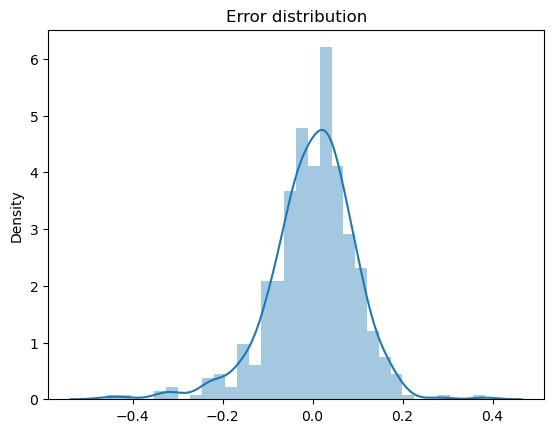

In [61]:
# Getting the predicted values (y_train_pred) from the trained model
y_train_pred = lr_model.predict(X_train_lr5)

# Calculating residuals by subtracting the predicted values from the actual values
res = y_train - y_train_pred

# Plotting the distribution of residuals
sns.distplot(res)
plt.title('Error distribution')
plt.show()


### Generating Predictions for the Test Set

In [62]:
# Perform Min-Max scaling on the test set
# Checking the variables to be standardized (scaler_var)
scaler_var


['hum', 'windspeed', 'temp', 'cnt']

In [64]:
# Perform scaling on the test dataset (b_bike_test)
# The train dataset is fitted, while the test dataset is only transformed based on the training data fit
b_bike_test[scaler_var] = scaler.transform(b_bike_test[scaler_var])

# Display the summary statistics of the scaled test dataset
b_bike_test.describe()


,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293,0.522154,0.059091,0.086364,0.100000,...,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584,0.219163,0.236333,0.281541,0.300684,...,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
# Building the test model using the variable 'temp'
# Preparing the variables for model building 

y_test = b_bike_test.pop('cnt')  # Pop the target variable 'cnt'
X_test = b_bike_test  # Use the remaining features for the test set

# Checking the values of the target variable 'y_test'
y_test.head(5)


184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [66]:
X_test.head(5)

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
299,0,0,0,0.511964,0.837699,0.334206,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [67]:
# Printing the feature variables of the model
X_train_lr5.columns


Index(['const', 'yr', 'holiday', 'temp', 'Dec', 'Jan', 'Nov', 'Sep',
       'Light Snow', 'Mist + Cloudy', 'spring', 'summer', 'winter'],
      dtype='object')

In [68]:
# Dropping the constant from the training dataset
X_train_lr5.drop(columns='const', inplace=True)

# Creating the new X_test dataset based on the feature variables using RFE
X_test_new = X_test[X_train_lr5.columns]

# Adding a constant variable to the new X_test dataset
X_test_new = sm.add_constant(X_test_new)

# Making predictions using the trained model
y_pred = lr_model.predict(X_test_new)


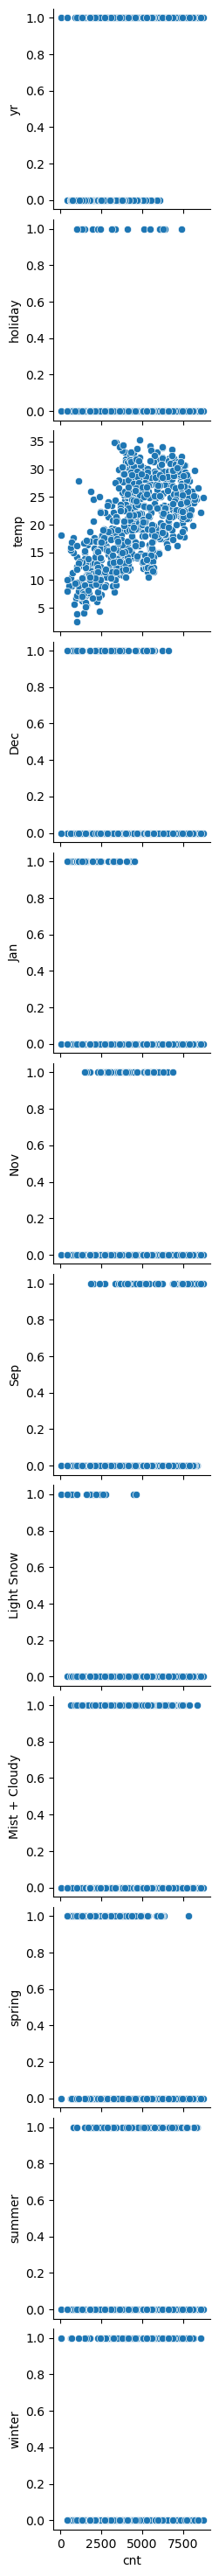

<Figure size 1600x1200 with 0 Axes>

In [70]:
# Build a scatter plot to observe the relationship between the dependent and feature variables
sns.pairplot(b_bike_df, y_vars=X_train_lr5.columns, x_vars='cnt')

# Display the plot with customized figure size
plt.figure(figsize=(16, 12))
plt.show()


##### Insights and Observations:
- Linear Relationship: The scatter plots show that temperature exhibits a clear linear relationship with the dependent variable (cnt), aligning with one of the key assumptions of linear regression.

- No Multicollinearity: From our earlier analysis, we have confirmed that all variables in the model have a Variance Inflation Factor (VIF) less than 5, ensuring that multicollinearity is not an issue. This indicates that the predictors in the model are not highly correlated with each other, making the model stable.

- Normal Error Distribution: The error distribution analysis reveals that the residuals are normally distributed, with a concentration around 0. This supports another assumption of linear regression, where the errors should be randomly distributed and follow a normal distribution.

These observations collectively suggest that the model meets the fundamental assumptions required for linear regression analysis, enhancing the reliability of the results.

### Evaluation and Prediction on the Test Set

In [71]:
r2_test = r2_score(y_true=y_test, y_pred=y_pred)
print('R² score on the test set is', r2_test)


R² score on the test set is 0.8193281686655678


In [72]:
r2_train = r2_score(y_true=y_train, y_pred=y_train_pred)
print('R² score on the train set is', r2_train)


R² score on the train set is 0.8238655230348482


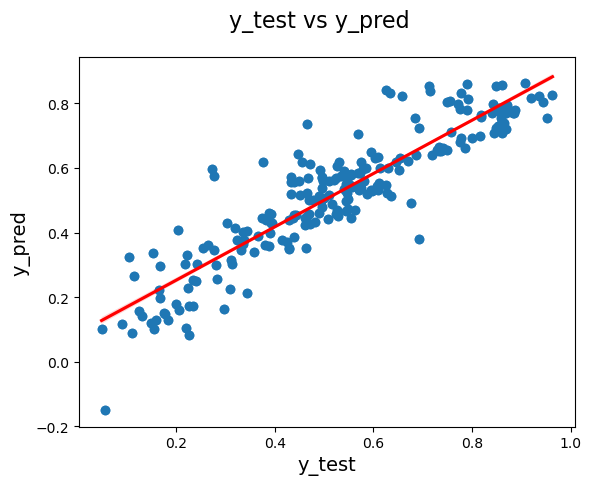

In [73]:
fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 16)
plt.xlabel('y_test', fontsize = 14)
plt.ylabel('y_pred', fontsize = 14) 
plt.show()


### Equation of the Best Fitted Line

The equation of the best-fitted line is as follows:

cnt = 0.2330×yr + 0.4900×temp - 0.1071×holiday + 0.0938×Sep - 0.0495×Sun - 0.3052×LightSnow - 0.0792×MistCloudy - 0.0637×spring + 0.0525×summer + 0.0981×winter + 0.1487

This equation represents the relationship between the dependent variable (`cnt`) and the selected independent variables, where each coefficient corresponds to the impact of that particular feature on the count.


In [74]:
# Finding the Mean Squared Error for both train and test sets

train_mse = mean_squared_error(y_true=y_train, y_pred=y_train_pred)
test_mse = mean_squared_error(y_true=y_test, y_pred=y_pred)

# Printing the results
print('Mean squared error of the train set is', train_mse)
print('Mean squared error of the test set is', test_mse)


Mean squared error of the train set is 0.008853569648083807
Mean squared error of the test set is 0.008638693442550048


The model's mean squared error (MSE) being close to 0 indicates that our model has a high accuracy in predicting the variance in both the test and train datasets. This suggests that the model is performing well in capturing the underlying patterns and can generalize effectively to new data.

### Summary, Insights, and Observations:
- Model Performance: The R-squared value for the training set is 82.71%, while the test set achieves a value of 81.13%. This indicates that the model is able to explain the variance in the target variable quite accurately, demonstrating strong performance both on the training and test data.

- Mean Squared Error (MSE): The model's mean squared error is close to 0 on both the training and test datasets, which indicates that the model is effectively predicting the variance in both sets, suggesting a good fit.

- Variable Selection: Significant variables were selected based on their p-values and Variance Inflation Factors (VIF). The Recursive Feature Elimination (RFE) method was also used to automate the selection process, ensuring that only the most relevant features were included in the model.

**Key Insights**:

- Temperature and Working Days: The demand for bikes is closely tied to temperature, with higher rentals associated with colder temperatures. Additionally, bike rentals are more frequent on working days.
- Seasonal Trends: Rentals are higher in winter compared to summer and spring, with the months of September and October showing increased demand.
- Day of the Week: Wednesdays, Thursdays, and Saturdays see higher rental numbers, with a notable increase during holidays.
- Year-over-Year Growth: The model indicates that rentals in 2019 were higher than in 2018, suggesting an increasing trend in bike rentals over time.

**Recommendations**:

- Marketing Strategy: Given the lower rental demand during summer and spring, a strong marketing strategy targeting these months can help boost demand. Special promotions or discounts could be effective in attracting more users during these periods.
- Weather-Related Strategies: For days with less favorable weather (e.g., cloudy or rainy days), introducing incentives or strategic deals could help increase rentals.
- Customer Retention: Since rentals in 2019 were higher than in 2018, the company should focus on retaining repeat customers and continuously engaging new users through promotions and marketing efforts.

These insights and observations offer a detailed understanding of customer behavior in the bike rental market, helping the company make informed decisions about marketing, user engagement, and overall business strategy.